In [85]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import PIL

# Steps

- create dataset
- segregate dataset into test and train
- Construct the neural network model
- train the model
- evaluate the model

In [10]:
# dataset creation and segregation
mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

9

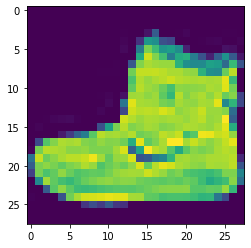

In [25]:
plt.imshow(train_images[0])
train_labels[0]

In [26]:
train_images = train_images/255.0

In [27]:
test_images = test_images/255.0

In [49]:
# creating a model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')
                                   ])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [50]:
# start training 
model.fit(train_images, train_labels, epochs=15)
test_loss, test_acuracy = model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 212us/sample - loss: 0.5057 - accuracy: 0.8174
Epoch 2/15
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3738 - accuracy: 0.8621
Epoch 3/15
60000/60000 [==============================] - 12s 204us/sample - loss: 0.3364 - accuracy: 0.8759
Epoch 4/15
60000/60000 [==============================] - 12s 201us/sample - loss: 0.3133 - accuracy: 0.8849
Epoch 5/15
60000/60000 [==============================] - 12s 201us/sample - loss: 0.2980 - accuracy: 0.8892
Epoch 6/15
60000/60000 [==============================] - 12s 201us/sample - loss: 0.2807 - accuracy: 0.8967
Epoch 7/15
60000/60000 [==============================] - 12s 201us/sample - loss: 0.2671 - accuracy: 0.8996
Epoch 8/15
60000/60000 [==============================] - 12s 202us/sample - loss: 0.2569 - accuracy: 0.9030
Epoch 9/15
60000/60000 [==============================] - 12s 201us/sample - loss: 0.2475 - accuracy: 0.9

In [51]:
# predict
pred = model.predict(test_images)

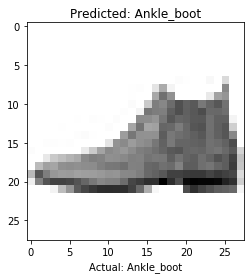

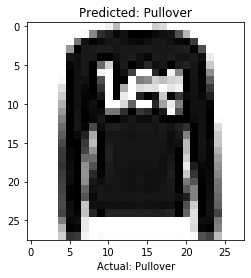

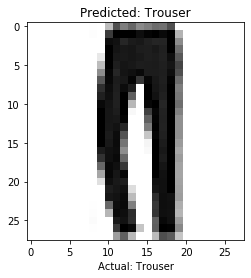

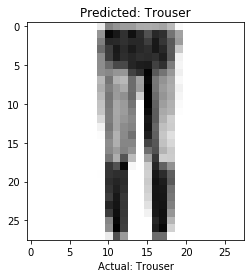

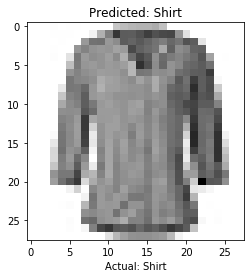

In [55]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Predicted: "+ class_names[np.argmax(pred[i])])
    plt.show()

# MNIST HANDWRITING

In [57]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [58]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

5

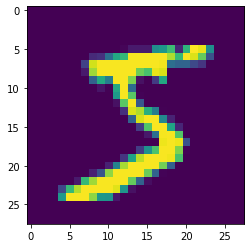

In [59]:
plt.imshow(train_images[0])
train_labels[0]

In [60]:
train_images = train_images/255.0
test_images = test_images/255.0

In [61]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')
                                   ])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [62]:
model.fit(train_images, train_labels, epochs=12)
test_loss, test_acuracy = model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 247us/sample - loss: 0.2249 - accuracy: 0.9323
Epoch 2/12
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0982 - accuracy: 0.9706
Epoch 3/12
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0725 - accuracy: 0.9782
Epoch 4/12
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0568 - accuracy: 0.9831
Epoch 5/12
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0467 - accuracy: 0.9861
Epoch 6/12
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0373 - accuracy: 0.9887
Epoch 7/12
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0352 - accuracy: 0.9898
Epoch 8/12
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0314 - accuracy: 0.9908
Epoch 9/12
60000/60000 [==============================] - 12s 206us/sample - loss: 0.0261 - accuracy: 0.9

In [63]:
pred = model.predict(test_images)

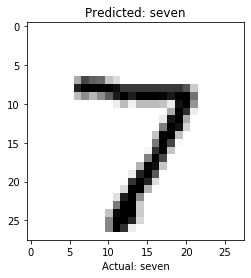

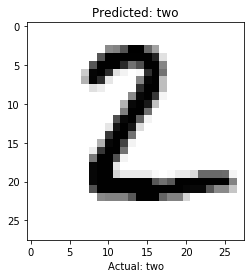

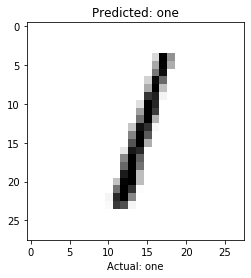

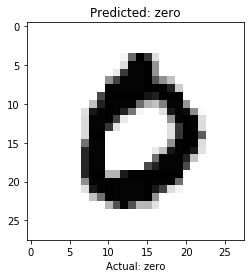

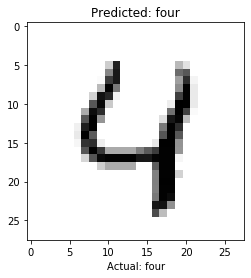

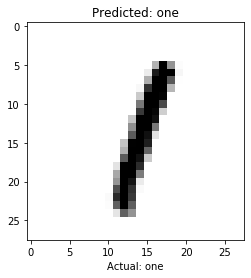

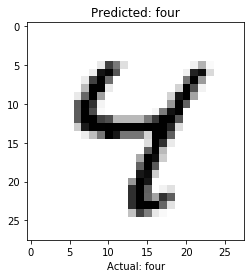

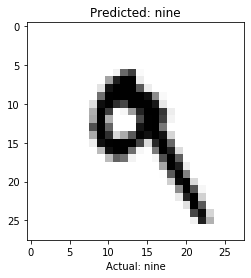

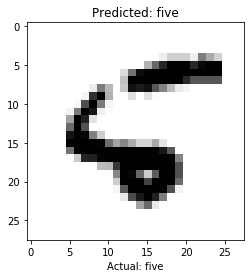

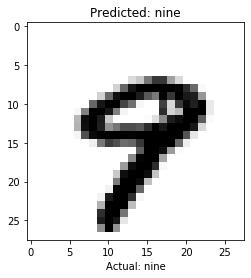

In [65]:
for i in range(10):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Predicted: "+ class_names[np.argmax(pred[i])])
    plt.show()

# CATS AND DOGS

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.Image

In [36]:

URL = 'https://s3.eu-central-1.amazonaws.com/avg-karlsruhe/objects_2011_b.zip'

path_to_zip = tf.keras.utils.get_file('objects_2011_a.zip',origin=URL, extract=True)

In [39]:
class_names = ['man', 'car']
PATH = os.path.join(os.path.dirname(path_to_zip), 'car_and_man')

In [40]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'test')


In [41]:
train_cats_dir = os.path.join(train_dir, 'man')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'car')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'man')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'car')  # directory with our validation dog pictures
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

In [42]:
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))


In [43]:
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [44]:
print('total training man images:', num_cats_tr)
print('total training car images:', num_dogs_tr)

print('total validation man images:', num_cats_val)
print('total validation car images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training man images: 201
total training car images: 201
total validation man images: 51
total validation car images: 51
--
Total training images: 402
Total validation images: 102


In [45]:
batch_size = 100
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [46]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [47]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

sample_training_images, _ = next(train_data_gen)


Found 401 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [48]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])


In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [50]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


  ...
    to  
  ['...']


C:\Users\Vedansh\Anaconda3\envs\tf\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


  ...
    to  
  ['...']
Train for 4 steps, validate for 1 steps
Epoch 1/10
3/4 [=====================>........] - ETA: 1s - loss: 1.7696 - accuracy: 0.4667

C:\Users\Vedansh\Anaconda3\envs\tf\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


4/4 [==============================] - 8s 2s/step - loss: 1.5275 - accuracy: 0.4900 - val_loss: 0.8138 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 6s 1s/step - loss: 0.7464 - accuracy: 0.5025 - val_loss: 0.6761 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.6739 - accuracy: 0.5249 - val_loss: 0.6704 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.6339 - accuracy: 0.5382 - val_loss: 0.6170 - val_accuracy: 0.5400
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.5556 - accuracy: 0.7342 - val_loss: 0.5362 - val_accuracy: 0.6600
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.4910 - accuracy: 0.9103 - val_loss: 0.4796 - val_accuracy: 0.7200
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.3444 - accuracy: 0.8671 - val_loss: 0.3967 - val_accuracy: 0.8700
Epoch 8/10
4/4 [==============================] - 5s

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

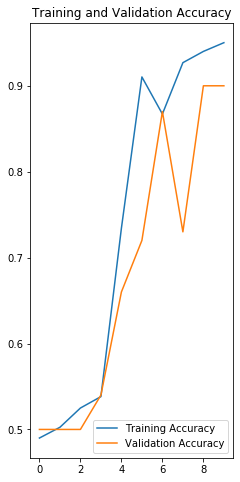

In [52]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


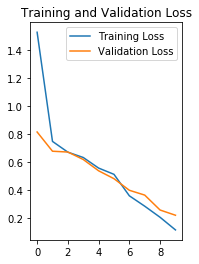

In [53]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [54]:
predictions = model.predict(sample_training_images)
print(predictions)

[[-3.7218552 ]
 [ 0.5596985 ]
 [-1.8646412 ]
 [ 4.6633043 ]
 [-5.822052  ]
 [ 3.7304358 ]
 [ 4.848134  ]
 [ 3.3674462 ]
 [ 1.2590225 ]
 [-4.1479893 ]
 [ 3.7682965 ]
 [-3.8050065 ]
 [-4.388317  ]
 [-2.7212665 ]
 [-2.470739  ]
 [ 6.286275  ]
 [-6.1149526 ]
 [-6.086612  ]
 [-3.514203  ]
 [-2.94465   ]
 [ 1.9673855 ]
 [-4.970637  ]
 [ 1.0368693 ]
 [ 3.4697108 ]
 [-6.133039  ]
 [-4.15068   ]
 [-4.3639584 ]
 [-2.5705166 ]
 [-1.1167947 ]
 [-4.5947404 ]
 [ 4.4971395 ]
 [ 2.9830265 ]
 [-5.0690904 ]
 [-4.977849  ]
 [ 1.3635726 ]
 [ 5.278551  ]
 [ 2.3474617 ]
 [-5.1666327 ]
 [ 0.24318925]
 [-7.0073195 ]
 [-7.0440555 ]
 [ 2.282796  ]
 [-5.494218  ]
 [ 3.6143043 ]
 [ 3.1601048 ]
 [-4.218097  ]
 [-4.571718  ]
 [-0.22379938]
 [ 4.3047533 ]
 [-6.341254  ]
 [-4.6427364 ]
 [-3.1861734 ]
 [-1.8707491 ]
 [-3.999041  ]
 [ 0.62001634]
 [ 0.42904598]
 [ 4.20531   ]
 [-7.364749  ]
 [ 3.3816047 ]
 [-5.2537994 ]
 [ 2.5945396 ]
 [-5.460061  ]
 [ 2.1416292 ]
 [-4.982438  ]
 [-4.0979877 ]
 [ 3.4037776 ]
 [ 1.63759

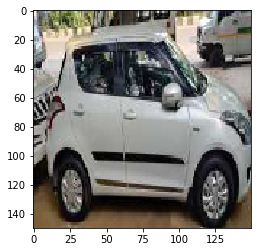

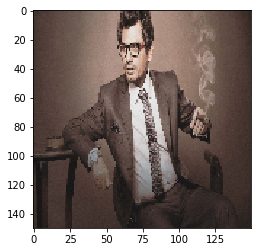

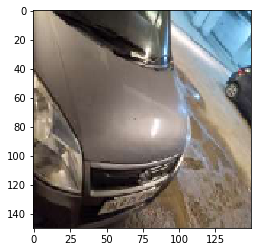

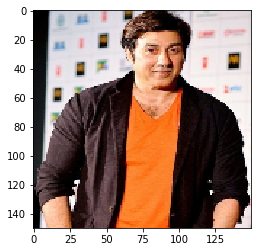

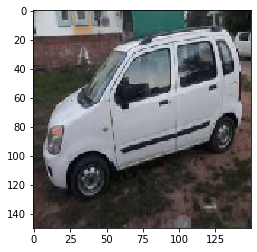

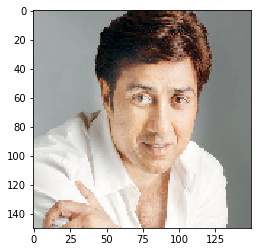

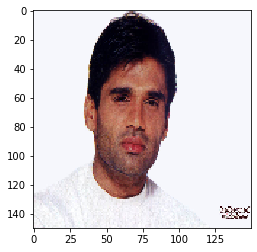

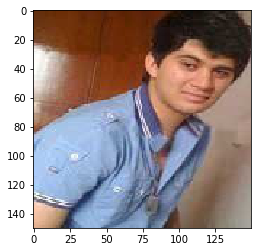

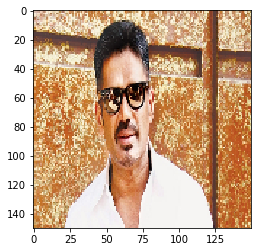

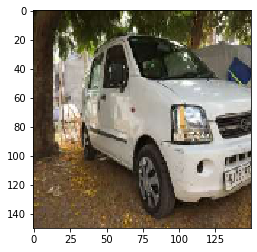

In [55]:
for i in range(10):
    plt.grid(False)
    plt.imshow(sample_training_images[i], cmap=plt.cm.binary)
    plt.show()
    if


# TASK